In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


temp0, train0 : min_match_count = 8, m.distance<0.8*n.distance, area:  0.75, 1.25
temp1, train

In [2]:
from IPython.display import clear_output
from matplotlib import pyplot as plt

temp1 = cv2.imread('template_0_0.jpg')
temp2 = cv2.imread('template_0_1.jpg')
temp3 = cv2.imread('template_1.jpg')
temp4 = cv2.imread('template_2.jpg')
temp5 = cv2.imread('template_3.jpg')
temp6 = cv2.imread('template_extreme.jpg')
temp = [temp1, temp2, temp3, temp4, temp5, temp6]

train_0 = cv2.imread('train_0.jpg')
train_1 = cv2.imread('train_1.jpg')
train_2 = cv2.imread('train_2.jpg')
train_3 = cv2.imread('train_3.jpg')
train_4 = cv2.imread('train_extreme.jpg')
train = [train_0, train_1, train_2, train_3, train_4] 

temp_gray = [cv2.cvtColor(t, cv2.COLOR_BGR2GRAY) for t in temp]
temp_rgb = [cv2.cvtColor(t, cv2.COLOR_BGR2RGB) for t in temp]
train_gray = [cv2.cvtColor(t, cv2.COLOR_BGR2GRAY) for t in train]
train_rgb = [cv2.cvtColor(t, cv2.COLOR_BGR2RGB) for t in train]

0 0
pass


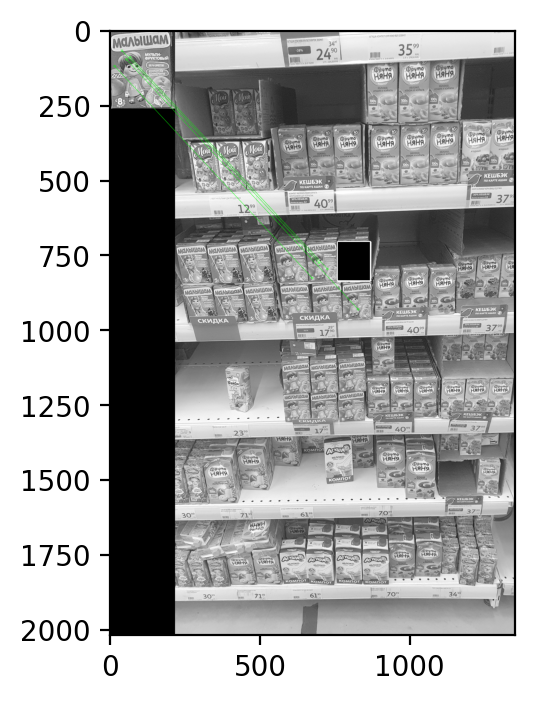

5


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matmul.dispatch.cpp:550: error: (-215:Assertion failed) scn + 1 == m.cols in function 'cv::perspectiveTransform'


In [26]:
# %%file test.py

import cv2
import numpy as np


MIN_MATCH_COUNT = 1
matchesMask = 0
list_of_bboxes = []
scale = 1
d_scale = 1

img1 = temp_gray[3].copy()          # queryImage
img2 = train_gray[2].copy()# trainImage

if img2.shape[0] > 1400:
    scale = 2
    d_scale = 0.4

img1_resized = cv2.resize(img1.copy(), (int(img1.shape[1]/scale), int(img1.shape[0]/scale)))
img2_resized = cv2.resize(img2.copy(), (int(img2.shape[1]/scale), int(img2.shape[0]/scale)))


delete = True
x = None
y = None
dx = 0
dy = 0
img2_resized = img2_resized.copy()

miss = 0
while True:

    if x!= None and y!= None and delete:
        img2_resized[x:x+dx,y:y+dy] = 0

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1_resized,None)
    kp2, des2 = sift.detectAndCompute(img2_resized,None)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < d_scale*n.distance:
            good.append(m)
    print(len(good))
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w = img1_resized.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        x = int(dst[0][0,1])
        y = int(dst[0][0,0])
        min = dst[0]
        max = dst[2]
        d = np.abs(max - min)
        dx = int(d[0,1])
        dy = int(d[0,0])
        area = dx*dy
        clear_output()
        print(dx, dy)

        # if area > 0*img1_resized.shape[0]*img1_resized.shape[1] and area < 1.85*img1_resized.shape[0]*img1_resized.shape[1] :
        #     list_of_bboxes.append((x/img2_resized_.shape[0],y/img2_resized_.shape[1], dx/img2_resized_.shape[0], dy/img2_resized_.shape[1]))
        if (dx > 0.4*img1_resized.shape[0]  and dx < 1.6*img1_resized.shape[0]) and \
            (dy > 0.4*img1_resized.shape[1] and dy < 1.6*img1_resized.shape[1]):
            list_of_bboxes.append((x/img2_resized.shape[0],y/img2_resized.shape[1], dx/img2_resized.shape[0], dy/img2_resized.shape[1]))
            print('Objects found:', len(list_of_bboxes))
            miss = 0
        else:
            miss +=1
            print('pass')
        if miss > 5:
            break

        # =============================== Visulizing =========================================
        img2_resized = cv2.polylines(img2_resized,[np.int32(dst)],True,(255,0,0),5, cv2.LINE_AA)
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                            singlePointColor = None,
                            matchesMask = matchesMask, # draw only inliers
                            flags = 2)

        img3 = cv2.drawMatches(img1,kp1,img2_resized,kp2,good,None,**draw_params)
        plt.figure(dpi=200)
        plt.imshow(img3, 'gray'),plt.show()
        plt.show()
        # ========================================================================================

    else:
        print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        print('Completed')
        break

# plt.figure(dpi=150)
# plt.imshow(img2_resized_)
# plt.show()

xMin_list = [n[0]*img2.shape[0] for n in list_of_bboxes]
yMin_list = [n[1]*img2.shape[1] for n in list_of_bboxes]
dx_list = [n[2]*img2.shape[0] for n in list_of_bboxes]
dy_list = [n[3]*img2.shape[1] for n in list_of_bboxes]

plt.figure(dpi=350)
for i in range ( len(xMin_list)):
    plt.plot([yMin_list[i], yMin_list[i] + dy_list[i]], [xMin_list[i], xMin_list[i]], '-r', markersize=0.51)
    plt.plot([yMin_list[i], yMin_list[i]],              [xMin_list[i], xMin_list[i] + dx_list[i]], '-r', markersize=0.51)

    plt.plot([yMin_list[i] + dy_list[i], yMin_list[i]+ dy_list[i]], [xMin_list[i], xMin_list[i]+ dx_list[i]], '-r', markersize=0.51)
    plt.plot([yMin_list[i], yMin_list[i]+ dy_list[i]], [xMin_list[i]+ dx_list[i], xMin_list[i]+ dx_list[i]], '-r', markersize=0.51)
    # plt.plot([100,0], [100,1000], '-r')
plt.imshow(img2)
plt.show()

print(len(list_of_bboxes))

In [ ]:
a = [(0,1)]
b=[(1,1)]
a==b

In [3]:
from retrieval import predict_image

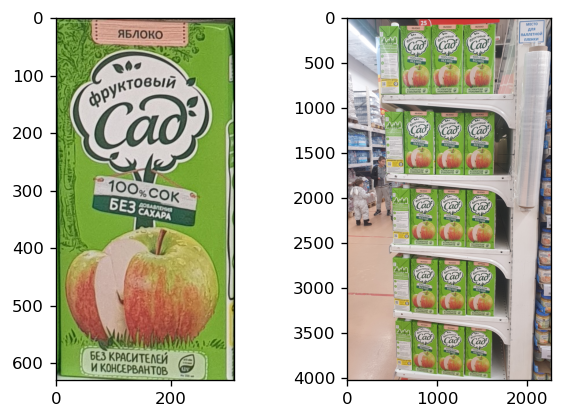

In [13]:
i = 1
j = 2

img = train[i]
query = temp[j]
plt.figure(dpi=120)
plt.subplot(1,2,1)
plt.imshow(temp_rgb[j])
plt.subplot(1,2,2)
plt.imshow(train_rgb[i])

In [ ]:
predict_image

In [14]:
list_of_bboxes = predict_image(img, query)


313 153
Objects found: 1317 154
Objects found: 2322 158
Objects found: 3304 154
Objects found: 4306 149
Objects found: 5309 152
Objects found: 6341 164
Objects found: 7346 170
Objects found: 8340 162
Objects found: 9376 173
Objects found: 10370 177
Objects found: 11375 171
Objects found: 12289 142
Objects found: 13287 146
Objects found: 14286 145
Objects found: 151492 1540
pass


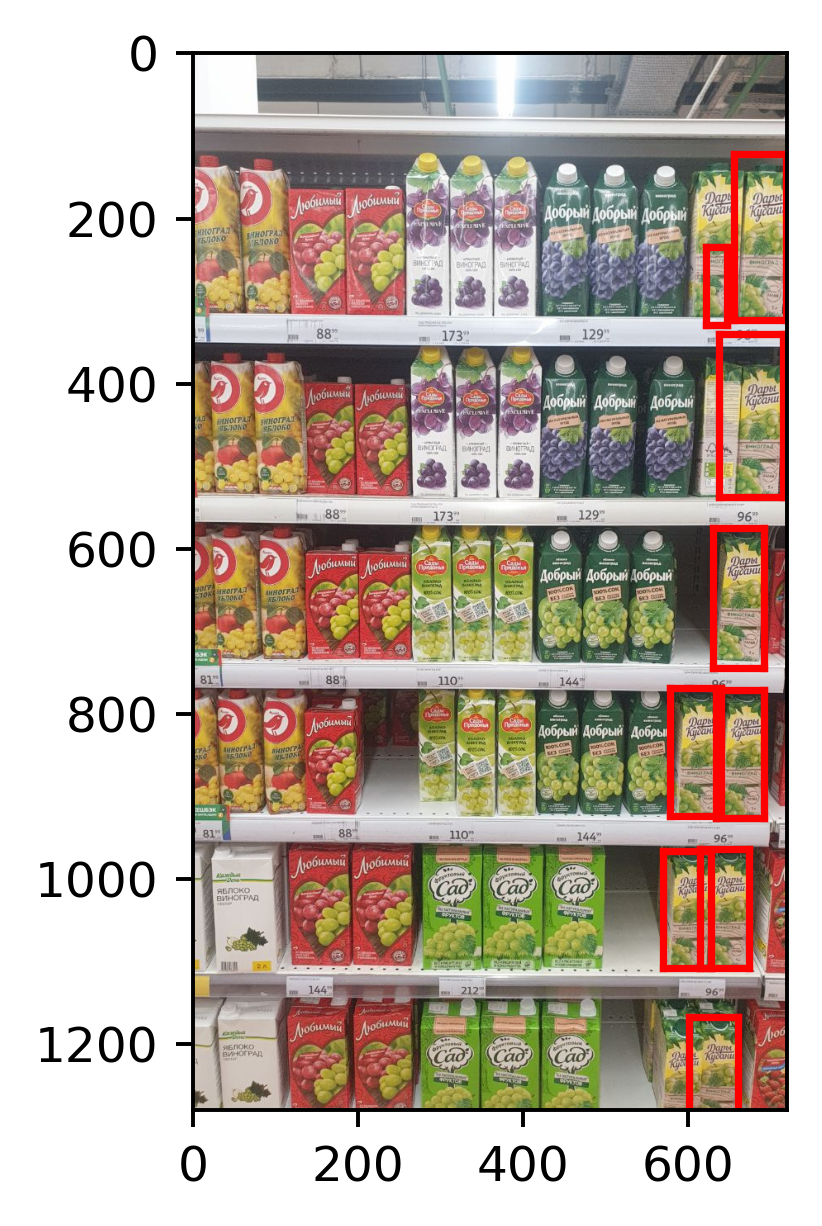

In [12]:
xMin_list = [n[0]*train_rgb[i].shape[0] for n in list_of_bboxes]
yMin_list = [n[1]*train_rgb[i].shape[1] for n in list_of_bboxes]
dx_list = [n[2]*train_rgb[i].shape[0] for n in list_of_bboxes]
dy_list = [n[3]*train_rgb[i].shape[1] for n in list_of_bboxes]

plt.figure(dpi=350)
for p in range ( len(xMin_list)):
    plt.plot([yMin_list[p], yMin_list[p] + dy_list[p]], [xMin_list[p], xMin_list[p]], '-r', markersize=0.51)
    plt.plot([yMin_list[p], yMin_list[p]],              [xMin_list[p], xMin_list[p] + dx_list[p]], '-r', markersize=0.51)

    plt.plot([yMin_list[p] + dy_list[p], yMin_list[p]+ dy_list[p]], [xMin_list[p], xMin_list[p]+ dx_list[p]], '-r', markersize=0.51)
    plt.plot([yMin_list[p], yMin_list[p]+ dy_list[p]], [xMin_list[p]+ dx_list[p], xMin_list[p]+ dx_list[p]], '-r', markersize=0.51)
    # plt.plot([100,0], [100,1000], '-r')
plt.imshow(train_rgb[i])

In [ ]:

if x!= None and y!= None:
    img2_resized_[x:x+dx,y:y+dy] = 0

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1_resized,None)
kp2, des2 = sift.detectAndCompute(img2_resized_,None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < d_scale*n.distance:
        good.append(m)
print(len(good))
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1_resized.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    x = int(dst[0][0,1])
    y = int(dst[0][0,0])
    min = dst[0]
    max = dst[2]
    d = max - min
    dx = int(d[0,1])
    dy = int(d[0,0])
    area = np.abs(dx*dy)
    if area > 0*img1_resized.shape[0]*img1_resized.shape[1] and area < 2*img1_resized.shape[0]*img1_resized.shape[1] :
        list_of_bboxes.append((x/img2_resized_.shape[0],y/img2_resized_.shape[1], dx/img2_resized_.shape[0], dy/img2_resized_.shape[1]))
        print('Objects found:', len(list_of_bboxes))
        miss = 0
    else:
        miss +=1
        print('pass')
        img2_ = cv2.polylines(img2_resized_,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
 
    

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    print('Completed')

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2_,kp2,good,None,**draw_params)
plt.figure(dpi=200)
plt.imshow(img3, 'gray'),plt.show()
    
# plt.figure(dpi=150)
# plt.imshow(img2_resized_)
# plt.show()

In [ ]:
plt.figure(dpi=150)
plt.imshow(train[3])

In [ ]:
list_of_bboxes[0]

In [ ]:
i=0 
x = int(list_of_bboxes[i][0]*img2.shape[0])
y = int(list_of_bboxes[i][1]*img2.shape[1])
dx = int(list_of_bboxes[i][2]*img2.shape[0])
dy = int(list_of_bboxes[i][3]*img2.shape[1])
plt.imshow(img2.copy()[x:x+dx, y:y+dy])

In [ ]:
i = 3
plt.figure(dpi=100)
# plt.plot(2000, 1000,'or')#
plt.plot(dst[i][0,0], dst[i][0,1], 'or') # y , x 
plt.imshow(img2)

In [ ]:
min = dst[0]
max = dst[2]
d = max - min
dx = int(d[0,1])
dy = int(d[0,0])
dx, dy

In [ ]:
%%file retrieval.py
import cv2
import numpy as np


def predict_image(img: np.ndarray, query: np.ndarray) -> list:
    MIN_MATCH_COUNT = 10

    img1 = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)         # queryImage
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # trainImage
    
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)

    else:
        print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

    if matchesMask!= None:
        list_of_bboxes = [(0, 0, 1, 1),]
    else:
        list_of_bboxes = []
    return list_of_bboxes
